<a href="https://colab.research.google.com/github/vani83prasad/vani83prasad/blob/main/Copy_of_CA_Pyhton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global SuperStore (Product Analysis)

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
path = kagglehub.dataset_download("fatihilhan/global-superstore-dataset")
csv_file_path = os.path.join(path, "superstore.csv")
print("Path to dataset files:", path)
print("Full path to CSV file:", csv_file_path)

# add /superstore.csv to your path
df = pd.read_csv(csv_file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/fatihilhan/global-superstore-dataset/versions/1
Full path to CSV file: /root/.cache/kagglehub/datasets/fatihilhan/global-superstore-dataset/versions/1/superstore.csv


In [ ]:
data=pd.read_csv("/root/.cache/kagglehub/datasets/fatihilhan/global-superstore-dataset/versions/1/superstore.csv")

In [ ]:
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,Order.Priority,Product.ID,Product.Name,Profit,Quantity,Region,Row.ID,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,High,OFF-PA-10002005,Xerox 225,9.3312,3,West,36624,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,Medium,OFF-PA-10002893,"Wirebound Service Call Books, 5 1/2"" x 4""",9.2928,2,West,37033,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10000659,"Adams Phone Message Book, Professional, 400 Me...",9.8418,3,West,31468,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,Medium,OFF-PA-10001144,Xerox 1913,53.2608,2,West,31469,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,High,OFF-PA-10002105,Xerox 223,3.1104,1,West,32440,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [ ]:
df.describe()

,Discount,记录数,Profit,Quantity,Row.ID,Sales,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290.000000,51290.000000,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,28.610982,3.476545,25645.50000,246.498440,26.375818,2012.777208,31.287112
std,0.212280,0.0,174.340972,2.278766,14806.29199,487.567175,57.296810,1.098931,14.429795
min,0.000000,1.0,-6599.978000,1.000000,1.00000,0.000000,0.002000,2011.000000,1.000000
25%,0.000000,1.0,0.000000,2.000000,12823.25000,31.000000,2.610000,2012.000000,20.000000
50%,0.000000,1.0,9.240000,3.000000,25645.50000,85.000000,7.790000,2013.000000,33.000000
75%,0.200000,1.0,36.810000,5.000000,38467.75000,251.000000,24.450000,2014.000000,44.000000
max,0.850000,1.0,8399.976000,14.000000,51290.00000,22638.000000,933.570000,2014.000000,53.000000


# **Global SuperStore Analysis (2011-2014)**
This project involves an in-depth analysis of a global superstore's performance, covering key aspects such as product sales, customer behavior, and market growth.

Key Highlights:

**Product Categories:**

Analyzed sales trends and profitability across regions and categories.
Identified top-performing products and regional preferences.

**Customer Insights:**

Explored customer segments and order patterns for better marketing strategies.

**Order Trends:**

Studied peak ordering times and yearly sales/profit dynamics.

**Market Growth:**

Assessed market share, growth percentages, and profitable regions.
This analysis provides actionable insights to improve strategies and drive success.



### DPP


### Global SuperStore Data Analysis

In [ ]:
# Top 10 Profitable Products WorldWide - Maybe for a marketing campaign ? or a discout season ?
Product_Profit = df.groupby("Product.Name")["Profit"].sum().sort_values(ascending=False)
top_10_products = Product_Profit.head(10)
print(top_10_products)

Product.Name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: Profit, dtype: float64


In [ ]:
d_null = data.isnull().sum()
d_null[d_null > 0]


,0


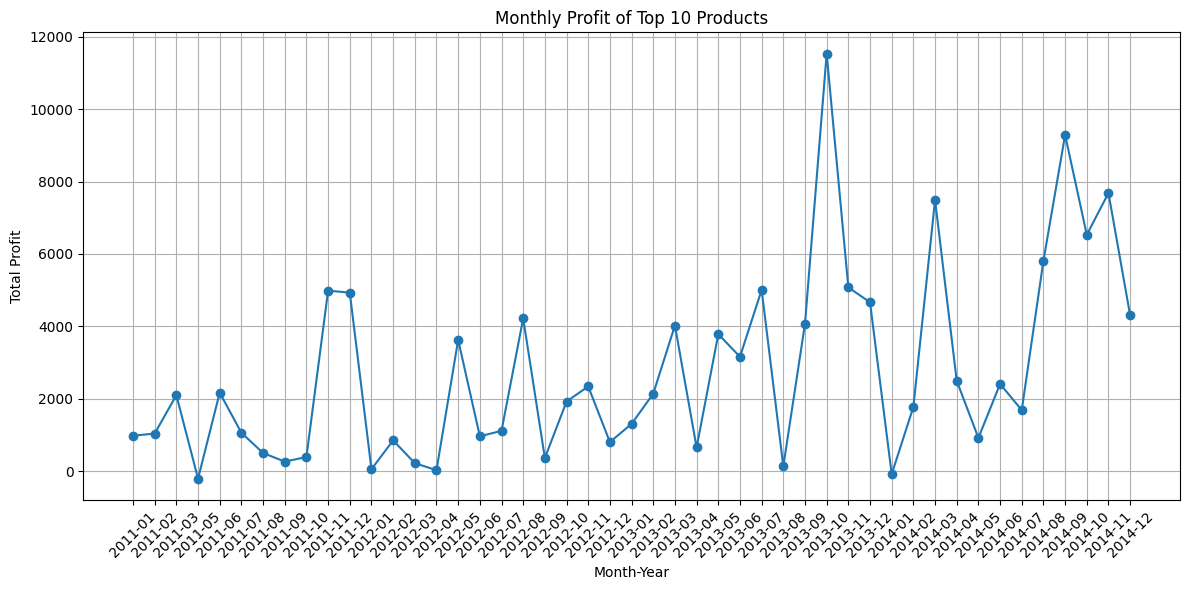

In [ ]:


# Ensure proper assignment with .loc
top_10_df = df[df['Product.Name'].isin(top_10_products.index)].copy()
top_10_df['YearMonth'] = pd.to_datetime(top_10_df['Order.Date']).dt.to_period('M')

# Group by YearMonth and calculate total profit
monthly_sales = top_10_df.groupby('YearMonth')['Profit'].sum().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['YearMonth'].astype(str), monthly_sales['Profit'], marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Profit of Top 10 Products')
plt.xlabel('Month-Year')
plt.ylabel('Total Profit')
plt.grid()
plt.tight_layout()
plt.show()




#### Insights :  Determine the optimal discount range that maximizes sales without heavily impacting profit margins.

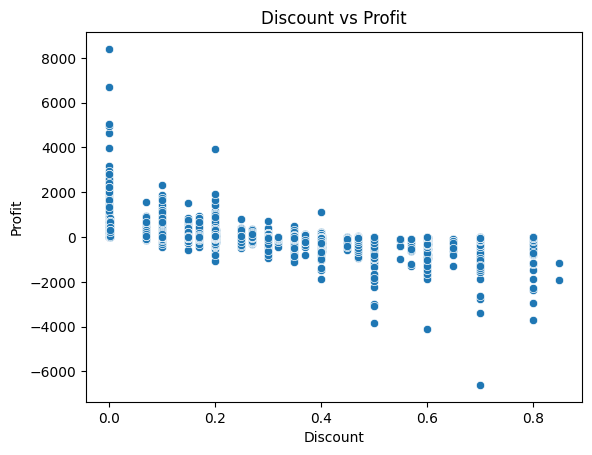

In [ ]:
# relationship between Discount and Profit:
sns.scatterplot(data=df, x="Discount", y="Profit")
plt.title("Discount vs Profit")
plt.show()

In [ ]:
# average profit per discount range
df["Discount.Range"] = pd.cut(df["Discount"], bins=[0, 0.1, 0.2, 0.3, 1.0], labels=["0-10%", "10-20%", "20-30%", ">30%"])
profit_by_discount = df.groupby("Discount.Range")["Profit"].mean()
print(profit_by_discount)

Discount.Range
0-10%     72.278107
10-20%    27.614734
20-30%   -21.877573
>30%     -76.587827
Name: Profit, dtype: float64


<ipython-input-37-62cc0ff8a233>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_by_discount = df.groupby("Discount.Range")["Profit"].mean()


#### Analyze the relationship between shipping modes, delivery dates, and profitability to optimize logistics

In [ ]:
df["Ship.Date"] = pd.to_datetime(df["Ship.Date"])
df["Order.Date"] = pd.to_datetime(df["Order.Date"])
df["Delivery.Time"] = (df["Ship.Date"] - df["Order.Date"]).dt.days

In [ ]:
avg_delivery_time = df.groupby("Ship.Mode")["Delivery.Time"].mean()
print(avg_delivery_time)

Ship.Mode
First Class       2.181746
Same Day          0.037394
Second Class      3.230187
Standard Class    4.998018
Name: Delivery.Time, dtype: float64


In [ ]:
df.groupby("Ship.Mode")["Profit"].mean()

,Profit
Ship.Mode,
First Class,27.728804
Same Day,28.201802
Second Class,28.381368
Standard Class,28.938945


In [ ]:
df.groupby("Ship.Mode")["Shipping.Cost"].mean()

,Shipping.Cost
Ship.Mode,
First Class,41.052970
Same Day,42.937325
Second Class,30.469666
Standard Class,19.971654


### Evaluate sales performance across Top 10 Countries, categories, or years to identify top-performing segments and areas for improvement.

In [ ]:
sales_by_region = df.groupby("Country")["Sales"].sum().sort_values(ascending=False).head(10)
print(sales_by_region)

Country
United States     2297354
Australia          925257
France             858930
China              700591
Germany            628857
Mexico             622620
India              589664
United Kingdom     528570
Indonesia          404887
Brazil             361098
Name: Sales, dtype: int64


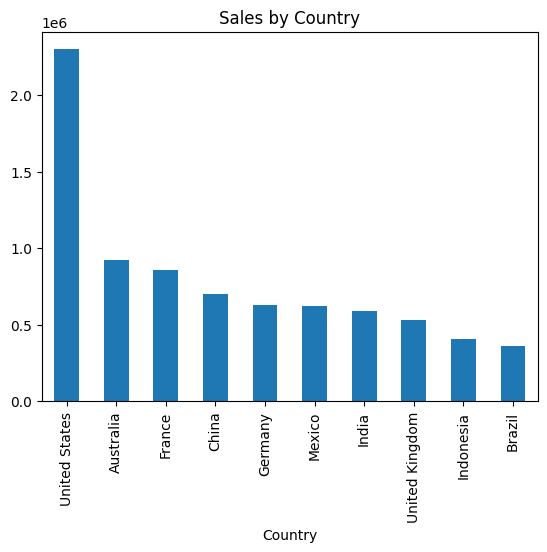

In [ ]:
sales_by_region.plot(kind="bar", title="Sales by Country")
plt.show()

In [ ]:
d_null=data.isnull().sum()
d_null[d_null>0]

,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data_object = data[[ 'Ship.Mode', 'Customer.ID', 'Customer.Name',
                     'Segment', 'Country', 'City', 'State', 'Region',
                     'Product.ID', 'Category', 'Sub.Category', 'Product.Name']]
data_object.head(20)


,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,State,Region,Product.ID,Category,Sub.Category,Product.Name
0,Second Class,LS-172304,Lycoris Saunders,Consumer,United States,Los Angeles,California,West,OFF-PA-10002005,Office Supplies,Paper,Xerox 225
1,Standard Class,MV-174854,Mark Van Huff,Consumer,United States,Los Angeles,California,West,OFF-PA-10002893,Office Supplies,Paper,"Wirebound Service Call Books, 5 1/2"" x 4"""
2,Standard Class,CS-121304,Chad Sievert,Consumer,United States,Los Angeles,California,West,OFF-PA-10000659,Office Supplies,Paper,"Adams Phone Message Book, Professional, 400 Me..."
3,Standard Class,CS-121304,Chad Sievert,Consumer,United States,Los Angeles,California,West,OFF-PA-10001144,Office Supplies,Paper,Xerox 1913
4,Standard Class,AP-109154,Arthur Prichep,Consumer,United States,Los Angeles,California,West,OFF-PA-10002105,Office Supplies,Paper,Xerox 223
5,Same Day,JF-154904,Jeremy Farry,Consumer,United States,Los Angeles,California,West,OFF-PA-10004519,Office Supplies,Paper,Spiral Phone Message Books with Labels by Adams
6,Standard Class,WB-218504,William Brown,Consumer,United States,Los Angeles,California,West,OFF-PA-10000223,Office Supplies,Paper,Xerox 2000
7,Standard Class,JA-159704,Joseph Airdo,Consumer,United States,Los Angeles,California,West,OFF-PA-10001947,Office Supplies,Paper,Xerox 1974
8,Standard Class,SP-209204,Susan Pistek,Consumer,United States,Los Angeles,California,West,OFF-PA-10002245,Office Supplies,Paper,Xerox 1895
9,Standard Class,RL-196154,Rob Lucas,Consumer,United States,Los Angeles,California,West,OFF-PA-10001363,Office Supplies,Paper,Xerox 1933


In [ ]:
for feature in data_object:
    print(feature,':',data_object[feature].nunique())

Ship.Mode : 4
Customer.ID : 4873
Customer.Name : 795
Segment : 3
Country : 147
City : 3636
State : 1094
Region : 13
Product.ID : 10292
Category : 3
Sub.Category : 17
Product.Name : 3788


In [ ]:
data['Order.Date'].nunique()


1430

In [ ]:
data['Ship.Date'].nunique()


1464

### EDA


Bar Charts: Top Categories/Subcategories Create a bar chart for top-performing product categories and subcategories in terms of profit and sales.

<ipython-input-50-33e5911e4b6e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Category', data=top_categories.sort_values('Profit', ascending=False), palette='coolwarm')


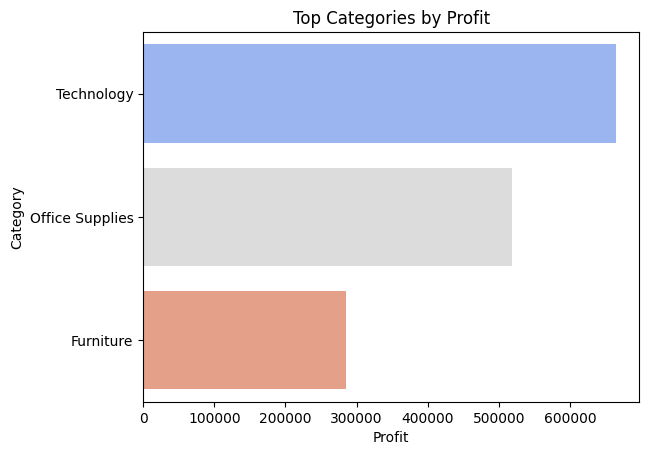

In [ ]:
top_categories = df.groupby('Category')[['Profit', 'Sales']].sum().reset_index()
sns.barplot(x='Profit', y='Category', data=top_categories.sort_values('Profit', ascending=False), palette='coolwarm')
plt.title('Top Categories by Profit')
plt.show()

Box Plots: Discounts Impacting Profitability Show variations in profitability across subcategories as influenced by discount rates.

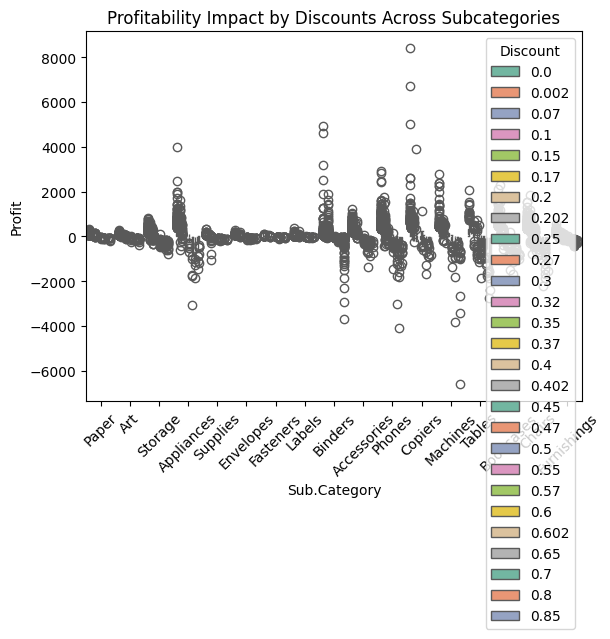

In [ ]:
sns.boxplot(x='Sub.Category', y='Profit', data=df, hue='Discount', palette='Set2')
plt.title('Profitability Impact by Discounts Across Subcategories')
plt.xticks(rotation=45)
plt.show()


Heatmaps: High-Sales, Low-Profit Items Highlight items with high sales but low profit using a heatmap.



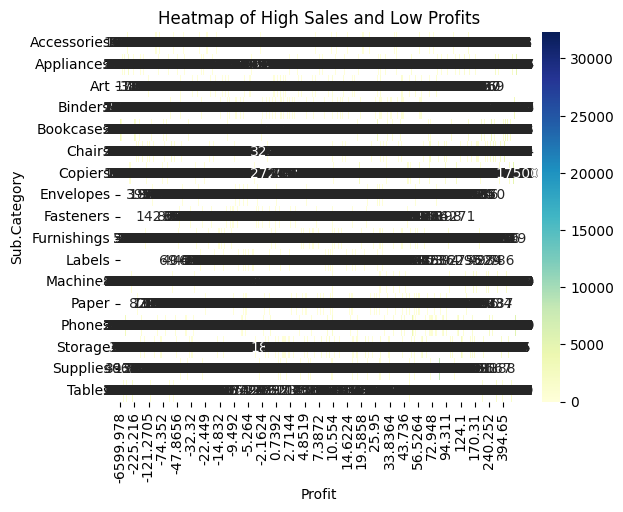

In [ ]:
pivot_table = df.pivot_table(values='Sales', index='Sub.Category', columns='Profit', aggfunc='sum')
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Heatmap of High Sales and Low Profits')
plt.show()


Geographic Maps: Market Insights Use geographical maps to identify regions excelling in specific categories.

<ipython-input-53-4d7a6cf1d7fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Profit', y='Region', data=region_data.sort_values('Profit', ascending=False), palette='viridis')


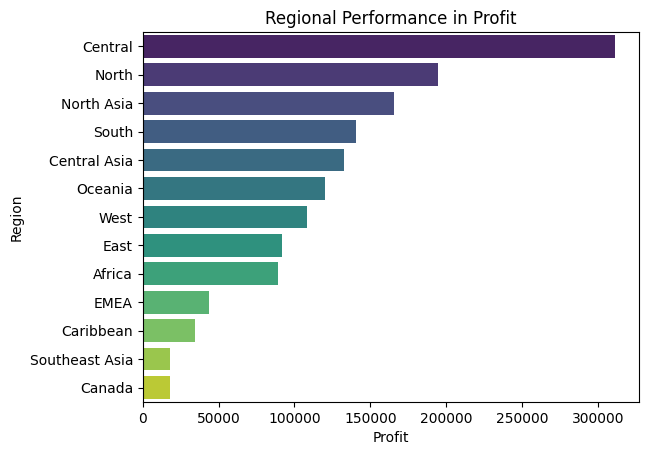

In [ ]:
region_data = df.groupby('Region')[['Profit', 'Sales']].sum().reset_index()
sns.barplot(x='Profit', y='Region', data=region_data.sort_values('Profit', ascending=False), palette='viridis')
plt.title('Regional Performance in Profit')
plt.show()


Scatter Plots: Discounts vs. Profitability Use scatter plots to depict relationships between discount rates and profitability.

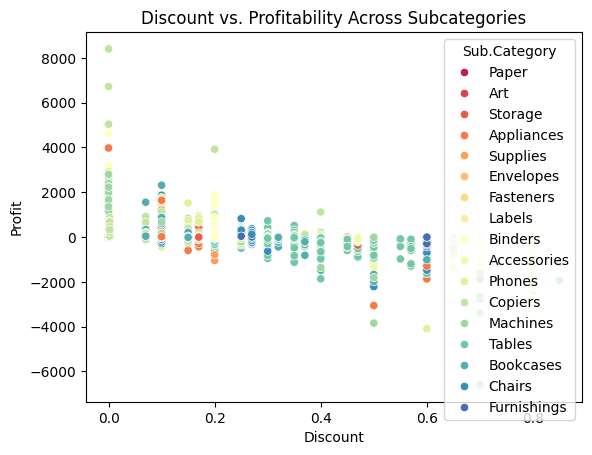

In [ ]:
sns.scatterplot(x='Discount', y='Profit', hue='Sub.Category', data=df, palette='Spectral')
plt.title('Discount vs. Profitability Across Subcategories')
plt.show()

Top selling products in the superstore

In [ ]:
product_group = data.groupby(["Product.Name"]).sum()["Sales"]
sort_product = product_group.sort_values(ascending=False)
sort_product


,Sales
Product.Name,
"Apple Smart Phone, Full Size",86936
"Cisco Smart Phone, Full Size",76441
"Motorola Smart Phone, Full Size",73159
"Nokia Smart Phone, Full Size",71904
Canon imageCLASS 2200 Advanced Copier,61600
"Hon Executive Leather Armchair, Adjustable",58200
"Office Star Executive Leather Armchair, Adjustable",50667
"Harbour Creations Executive Leather Armchair, Adjustable",50120
"Samsung Smart Phone, Cordless",48654


In [ ]:
max_product = pd.DataFrame(sort_product[:5])
max_product


,Sales
Product.Name,
"Apple Smart Phone, Full Size",86936
"Cisco Smart Phone, Full Size",76441
"Motorola Smart Phone, Full Size",73159
"Nokia Smart Phone, Full Size",71904
Canon imageCLASS 2200 Advanced Copier,61600


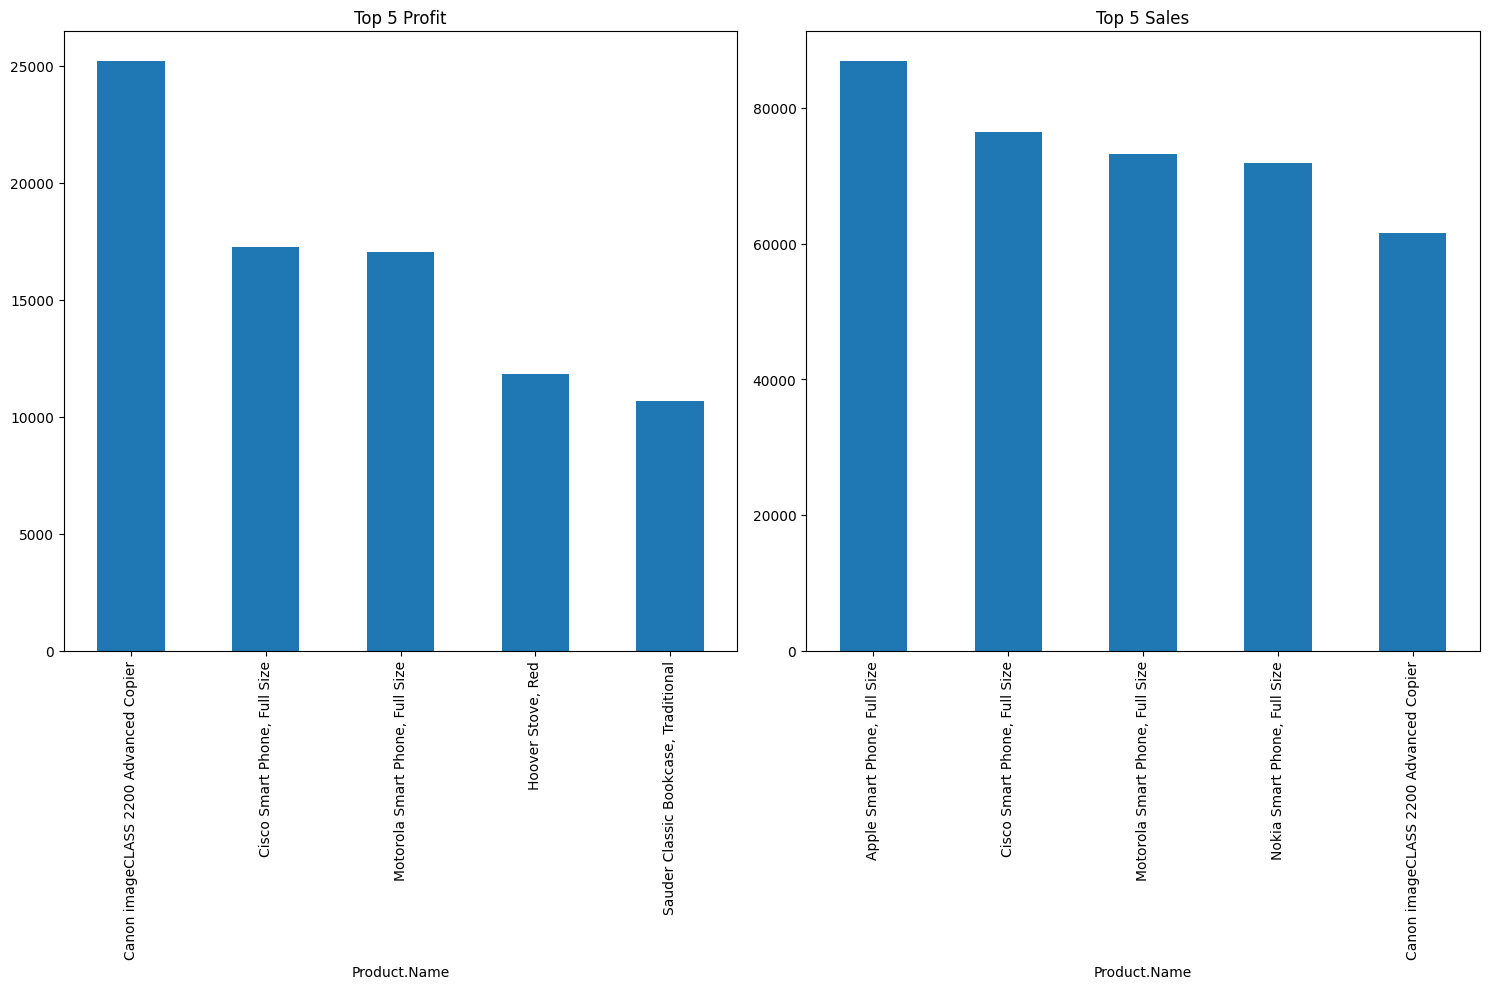

In [ ]:
# Grouping by 'Product Name' to calculate total profit
profit_group = data.groupby('Product.Name').sum()['Profit']
max_profit = profit_group.sort_values(ascending=False).head(5)

# Grouping by 'Product Name' to calculate total sales
sales_group = data.groupby('Product.Name').sum()['Sales']
max_product = sales_group.sort_values(ascending=False).head(5)

# Now plot the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

max_profit.plot(kind="bar", ax=ax1)
ax1.set_title('Top 5 Profit')

max_product.plot(kind="bar", ax=ax2)
ax2.set_title('Top 5 Sales')

plt.tight_layout()
plt.show()

